## Test 1. My first data science project

### In this lab you will apply the concepts and techniques developed in previous sessions. You are expected to work on the assignments on your own DURING the duration of the lab.

### You are expected to submit the code developed as well as a brief description of your findings and insights.

### This lab represents 30% of the total marking of the module¶

TO DO: Description of the challenge

### Let's load and install some libraries

In [1]:
!pip install py-openaq

  Created wheel for py-openaq: filename=py_openaq-1.1.0-py3-none-any.whl size=9037 sha256=d6cc74bfc233655bd0b10118ad036bc12e3ea6368b2240ed61eadb639408d21b
  Stored in directory: /home/jovyan/.cache/pip/wheels/b7/64/46/caec8d415716f8ebeb1e95f11d8c83aff852f41ab6eb1dc98f
Successfully built py-openaq


In [2]:
import pandas as pd
import seaborn as sns
import openaq
import matplotlib as mpl
import matplotlib.pyplot as plt

### Let's load the dataset

In [3]:
airQualityCities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458_OLD/master/data/airQualityCities.csv')

In [4]:
airQualityCities.sample(5)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
13958,2021-10-03 06:00:00,Thurrock,o3,46.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-03 05:00:00+00:00,51.477070,0.317969
35853,2021-09-28 23:15:00,"Okhla Phase-2, Delhi - DPCC",pm10,111.00,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 17:45:00+00:00,28.530785,77.271255
6398,2021-10-08 21:00:00,London Harlington,pm10,10.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-08 20:00:00+00:00,51.488790,-0.441614
17929,2021-10-01 03:00:00,DEBE032,pm10,9.59,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-10-01 01:00:00+00:00,52.473192,13.225144
5766,2021-10-09 02:00:00,ES1808A,pm10,7.00,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-09 03:00:00+00:00,40.368890,-4.396940


In [5]:
airQualityCities.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
0,2021-10-12 23:00:00,US Diplomatic Post: New Delhi,pm25,-999.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-10-12 17:30:00+00:00,28.635760,77.224450
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766


In [6]:
airQualityCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37087 entries, 0 to 37086
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date.local             37087 non-null  object 
 1   location               37087 non-null  object 
 2   parameter              37087 non-null  object 
 3   value                  37087 non-null  float64
 4   unit                   37087 non-null  object 
 5   country                37087 non-null  object 
 6   city                   37087 non-null  object 
 7   date.utc               37087 non-null  object 
 8   coordinates.latitude   37087 non-null  float64
 9   coordinates.longitude  37087 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.8+ MB


In [7]:
airQualityCities.groupby('city').count()

,date.local,location,parameter,value,unit,country,date.utc,coordinates.latitude,coordinates.longitude
city,,,,,,,,,
Beijing,300,300,300,300,300,300,300,300,300
Berlin,2248,2248,2248,2248,2248,2248,2248,2248,2248
Delhi,16265,16265,16265,16265,16265,16265,16265,16265,16265
London,5772,5772,5772,5772,5772,5772,5772,5772,5772
Madrid,7400,7400,7400,7400,7400,7400,7400,7400,7400
Paris,5102,5102,5102,5102,5102,5102,5102,5102,5102


In [8]:
airQualityCities.groupby('parameter').count()

,date.local,location,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
parameter,,,,,,,,,
co,3248,3248,3248,3248,3248,3248,3248,3248,3248
no2,10417,10417,10417,10417,10417,10417,10417,10417,10417
o3,7401,7401,7401,7401,7401,7401,7401,7401,7401
pm10,7206,7206,7206,7206,7206,7206,7206,7206,7206
pm25,5783,5783,5783,5783,5783,5783,5783,5783,5783
so2,3032,3032,3032,3032,3032,3032,3032,3032,3032


## Question 1. Find cities with levels of O3 larger than 120 µg/m³ 

In [9]:
O3ofCities=airQualityCities[airQualityCities['parameter']=='o3']

In [10]:
O3largerthan120Cities=O3ofCities[O3ofCities['value']>120]

In [11]:
O3largerthan120Cities

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
26683,2021-09-29 22:45:00,"Jahangirpuri, Delhi - DPCC",o3,162.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 17:15:00+00:00,28.732820,77.170633
27279,2021-09-29 21:15:00,"Ashok Vihar, Delhi - DPCC",o3,125.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 15:45:00+00:00,28.695381,77.181665
28675,2021-09-29 17:45:00,"DTU, Delhi - CPCB",o3,263.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 12:15:00+00:00,28.750050,77.111261
28868,2021-09-29 17:15:00,"DTU, Delhi - CPCB",o3,147.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 11:45:00+00:00,28.750050,77.111261
29656,2021-09-29 15:15:00,"Aya Nagar, Delhi - IMD",o3,272.67,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:45:00+00:00,28.470691,77.109936
29718,2021-09-29 14:45:00,"Chandni Chowk, Delhi - IITM",o3,295.15,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.656756,77.227234
29733,2021-09-29 14:45:00,"Aya Nagar, Delhi - IMD",o3,278.88,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.470691,77.109936
30080,2021-09-29 13:45:00,"IHBAS, Dilshad Garden, Delhi - CPCB",o3,148.23,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 08:15:00+00:00,28.681174,77.302523
36164,2021-09-28 22:15:00,"Ashok Vihar, Delhi - DPCC",o3,205.50,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 16:45:00+00:00,28.695381,77.181665
36327,2021-09-28 22:00:00,"North Campus, DU, Delhi - IMD",o3,121.33,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 16:30:00+00:00,28.657381,77.158545


In [12]:
O3largerthan120Cities.groupby('city').count()

,date.local,location,parameter,value,unit,country,date.utc,coordinates.latitude,coordinates.longitude
city,,,,,,,,,
Delhi,10,10,10,10,10,10,10,10,10
Madrid,1,1,1,1,1,1,1,1,1


#response:The cities with levels of O3 larger than 120 µg/m³ are Delhi and Madrid

## Question 2. Which city has the cleanest air ?
### Tip: consider adapting the following example: https://seaborn.pydata.org/examples/grouped_boxplot.html

In [13]:
COofCities=airQualityCities[airQualityCities['parameter']=='co']

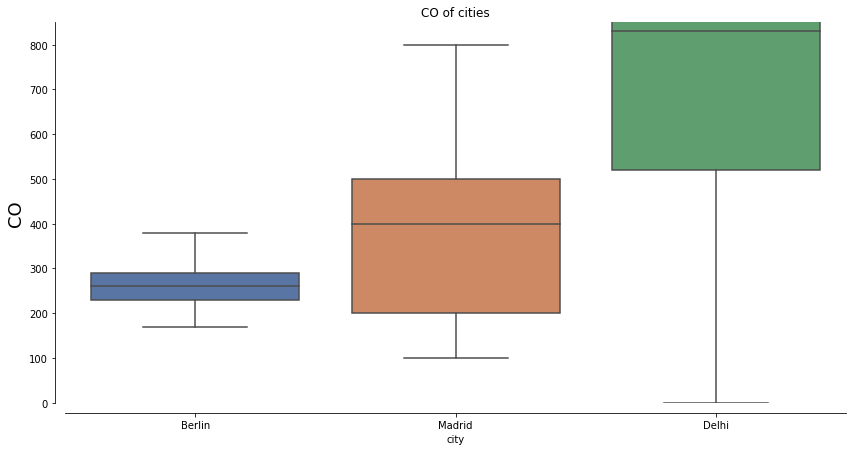

In [14]:
fig, ax = plt.subplots(1, figsize=(14,7))
ax = sns.boxplot(
    x='city',
    y='value',
    data=COofCities,
    fliersize=0,
    palette='deep',
    ax=ax)
ax.set_ylim([0, 850])
ax.set_ylabel("CO", fontsize=18)
ax.set_xlabel("city")
ax.set_title("CO of cities")
sns.despine(offset=10)
plt.show()

In [15]:
NO2ofCities=airQualityCities[airQualityCities['parameter']=='no2']

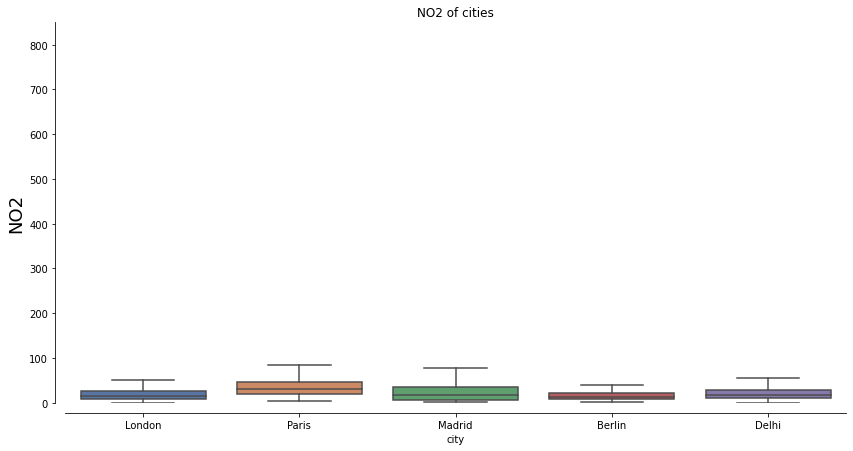

In [16]:
fig, ax = plt.subplots(1, figsize=(14,7))
ax = sns.boxplot(
    x='city',
    y='value',
    data=NO2ofCities,
    fliersize=0,
    palette='deep',
    ax=ax)
ax.set_ylim([0, 850])
ax.set_ylabel("NO2", fontsize=18)
ax.set_xlabel("city")
ax.set_title("NO2 of cities")
sns.despine(offset=10)
plt.show()

In [17]:
O3ofCities=airQualityCities[airQualityCities['parameter']=='o3']

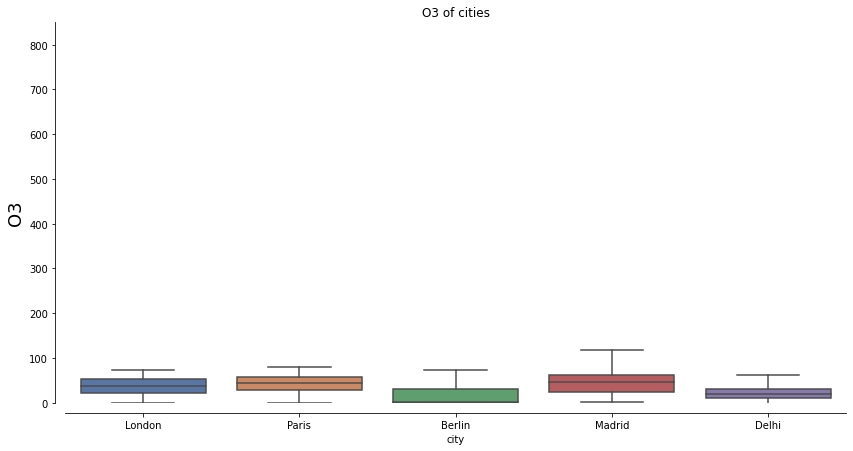

In [18]:
fig, ax = plt.subplots(1, figsize=(14,7))
ax = sns.boxplot(
    x='city',
    y='value',
    data=O3ofCities,
    fliersize=0,
    palette='deep',
    ax=ax)
ax.set_ylim([0, 850])
ax.set_ylabel("O3", fontsize=18)
ax.set_xlabel("city")
ax.set_title("O3 of cities")
sns.despine(offset=10)
plt.show()

In [19]:
PM10ofCities=airQualityCities[airQualityCities['parameter']=='pm10']

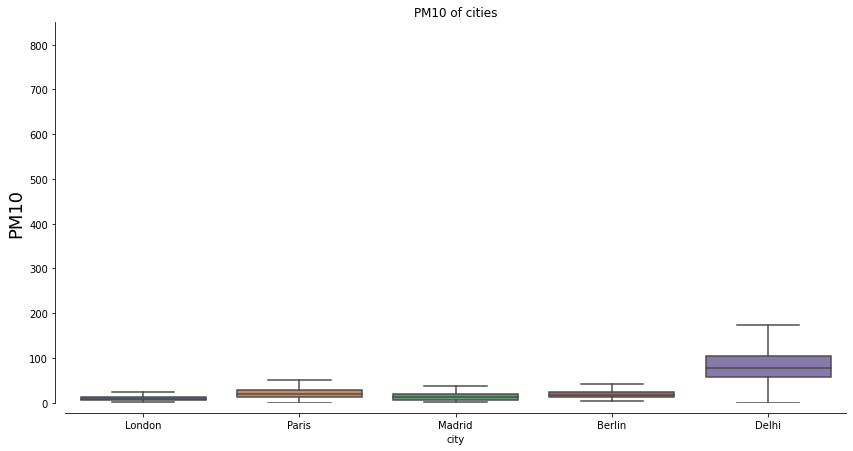

In [20]:
fig, ax = plt.subplots(1, figsize=(14,7))
ax = sns.boxplot(
    x='city',
    y='value',
    data=PM10ofCities,
    fliersize=0,
    palette='deep',
    ax=ax)
ax.set_ylim([0, 850])
ax.set_ylabel("PM10", fontsize=18)
ax.set_xlabel("city")
ax.set_title("PM10 of cities")
sns.despine(offset=10)
plt.show()

In [21]:
PM25ofCities=airQualityCities[airQualityCities['parameter']=='pm25']

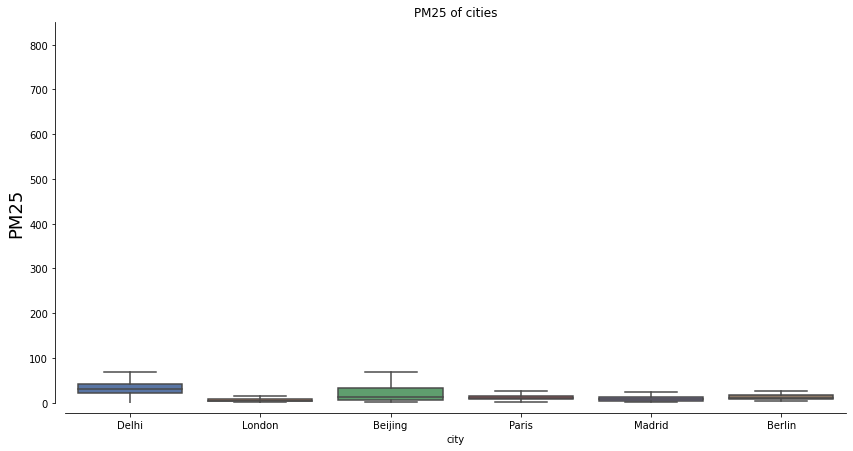

In [22]:
fig, ax = plt.subplots(1, figsize=(14,7))
ax = sns.boxplot(
    x='city',
    y='value',
    data=PM25ofCities,
    fliersize=0,
    palette='deep',
    ax=ax)
ax.set_ylim([0, 850])
ax.set_ylabel("PM25", fontsize=18)
ax.set_xlabel("city")
ax.set_title("PM25 of cities")
sns.despine(offset=10)
plt.show()

In [23]:
SO2ofCities=airQualityCities[airQualityCities['parameter']=='so2']

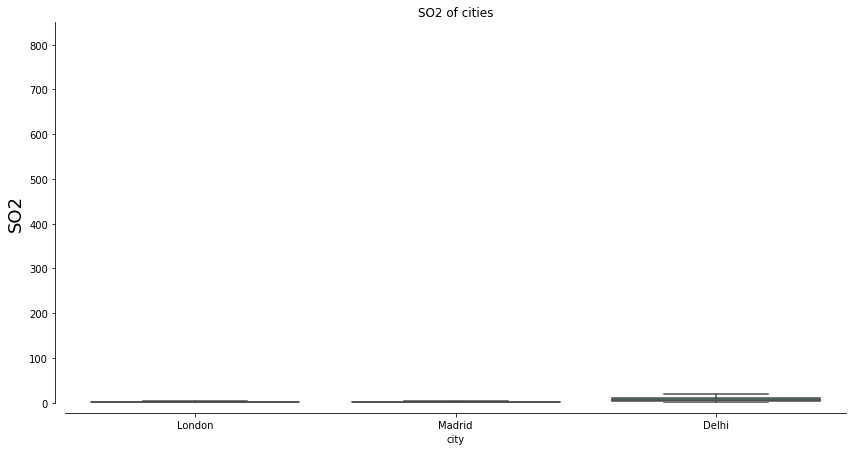

In [24]:
fig, ax = plt.subplots(1, figsize=(14,7))
ax = sns.boxplot(
    x='city',
    y='value',
    data=SO2ofCities,
    fliersize=0,
    palette='deep',
    ax=ax)
ax.set_ylim([0, 850])
ax.set_ylabel("SO2", fontsize=18)
ax.set_xlabel("city")
ax.set_title("SO2 of cities")
sns.despine(offset=10)
plt.show()

#response:PM25 is the only element tested in all cities and London has the lowest value. Considering London also performs best in NO2, PM10 and SO2, ranks the third lowest in O3, so London has the cleanest air.

## Question 3. Which location is the most poluted in London ?

In [25]:
airQualityLondon=airQualityCities[airQualityCities['city']=='London']

In [26]:
airQualityLondon.groupby('location').mean().sort_values(by='value',ascending=False)

,value,coordinates.latitude,coordinates.longitude
location,,,
London Haringey Priory Park South,29.631161,51.584128,-0.125254
Tower Hamlets Roadside,24.288514,51.522530,-0.042155
Southend-on-Sea,18.670849,51.544206,0.678408
London Harlington,18.375527,51.488790,-0.441614
Thurrock,17.024240,51.477070,0.317969
London Eltham,16.832881,51.452580,0.070766


#response:The "London Haringey Priory Park South" location is the most poluted in London.

## Question 4. Plot the evolution of air polution accross time in locations in London
### Tip: Consider using Relplot: https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

In [27]:
airQualityLondon.groupby(['date.local','location'])['value'].mean()

date.local           location                         
2021-09-28 16:00:00  London Eltham                        19.25
                     London Haringey Priory Park South    32.50
                     Southend-on-Sea                      20.75
                     Thurrock                             18.00
                     Tower Hamlets Roadside                8.00
                                                          ...  
2021-10-12 18:00:00  London Haringey Priory Park South    29.00
                     London Harlington                    19.50
                     Southend-on-Sea                      18.00
                     Thurrock                             18.50
                     Tower Hamlets Roadside               36.00
Name: value, Length: 1899, dtype: float64

In [28]:
AQLondontimeandlocation=pd.DataFrame(airQualityLondon.groupby(['date.local','location'])['value'].mean())

In [29]:
AQLondontimeandlocation

value
date.local          location                                
2021-09-28 16:00:00 London Eltham                      19.25
                    London Haringey Priory Park South  32.50
                    Southend-on-Sea                    20.75
                    Thurrock                           18.00
                    Tower Hamlets Roadside              8.00
...                                                      ...
2021-10-12 18:00:00 London Haringey Priory Park South  29.00
                    London Harlington                  19.50
                    Southend-on-Sea                    18.00
                    Thurrock                           18.50
                    Tower Hamlets Roadside             36.00

[1899 rows x 1 columns]

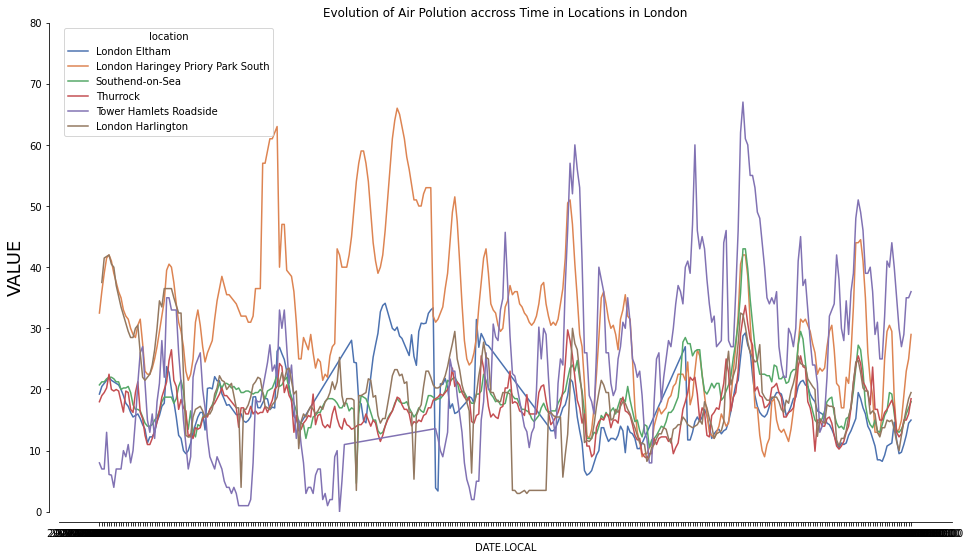

In [30]:
fig, ax = plt.subplots(1, figsize=(16,9))
ax = sns.lineplot(
    x='date.local',
    y='value',
    hue='location',
    data=AQLondontimeandlocation,
    palette='deep',
    ax=ax)
ax.set_ylim([0, 80])
ax.set_ylabel("VALUE", fontsize=18)
ax.set_xlabel("DATE.LOCAL")
ax.set_title("Evolution of Air Polution accross Time in Locations in London")
sns.despine(offset=10)
plt.show()

## Question 5: Is there any relationship between levels of PM25 and PM10 in London?

In [31]:
PM10andPM25ofLondon=airQualityLondon[(airQualityLondon['parameter']=='pm10')|(airQualityLondon['parameter']=='pm25')]

In [32]:
PM10andPM25ofLondon

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
5,2021-10-12 18:00:00,London Harlington,pm10,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
8,2021-10-12 18:00:00,London Eltham,pm10,13.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
9,2021-10-12 18:00:00,London Harlington,pm25,10.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
...,...,...,...,...,...,...,...,...,...,...
36873,2021-09-28 16:00:00,Southend-on-Sea,pm25,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.544206,0.678408
36900,2021-09-28 16:00:00,Southend-on-Sea,pm10,9.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.544206,0.678408
36940,2021-09-28 16:00:00,London Eltham,pm25,3.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.452580,0.070766
36965,2021-09-28 16:00:00,Thurrock,pm10,11.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.477070,0.317969


In [35]:
PM10andPM25ofLondonmean=pd.DataFrame(PM10andPM25ofLondon.groupby(['date.local','parameter'])['value'].mean())

In [36]:
PM10andPM25ofLondonmean

value
date.local          parameter           
2021-09-28 16:00:00 pm10        9.000000
                    pm25        3.500000
2021-09-28 17:00:00 pm10        9.000000
                    pm25        3.500000
2021-09-28 18:00:00 pm10        9.333333
...                                  ...
2021-10-12 16:00:00 pm25        9.000000
2021-10-12 17:00:00 pm10       17.250000
                    pm25        9.000000
2021-10-12 18:00:00 pm10       17.000000
                    pm25        9.000000

[678 rows x 1 columns]

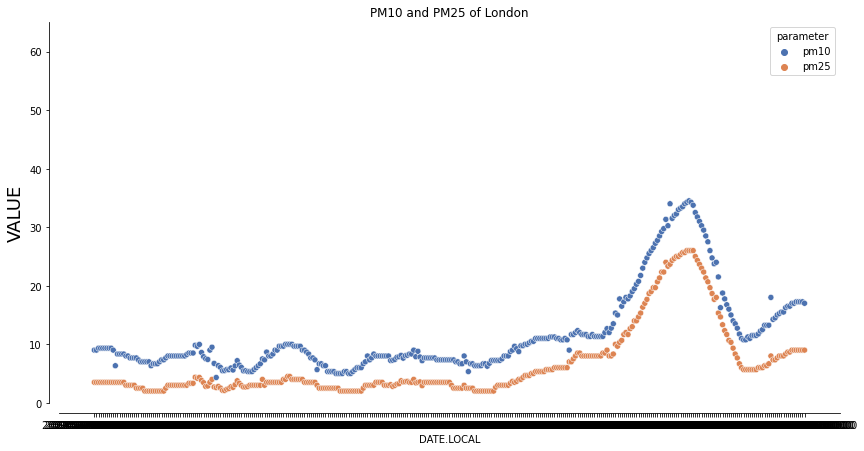

In [37]:
fig, ax = plt.subplots(1, figsize=(14,7))
ax = sns.scatterplot(
    x='date.local',
    y='value',
    hue='parameter',
    data=PM10andPM25ofLondonmean,
    palette='deep',
    ax=ax)
ax.set_ylim([0, 65])
ax.set_ylabel("VALUE", fontsize=18)
ax.set_xlabel("DATE.LOCAL")
ax.set_title("PM10 and PM25 of London")
sns.despine(offset=10)
plt.show()

### response: The trends of pm10 and pm25 are almost the same, which shows that they are strongly correlated.